## 0. Импорт библиотек и настройка стиля

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Настройки отображения
pd.options.display.max_columns = 100
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.facecolor'] = '#f7f7f7'
plt.rcParams['figure.facecolor'] = '#f2f2f2'

# Загрузка данных
df = pd.read_csv(r'/mnt/data/DATA (3).csv')
print("Размер данных:", df.shape)
df.head()


Размер данных: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Оценка структуры данных

In [ ]:

df.info()
display(df.describe(include='all').T.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Пропуски и дубликаты

Пропусков всего: 0
Дубликатов строк: 0


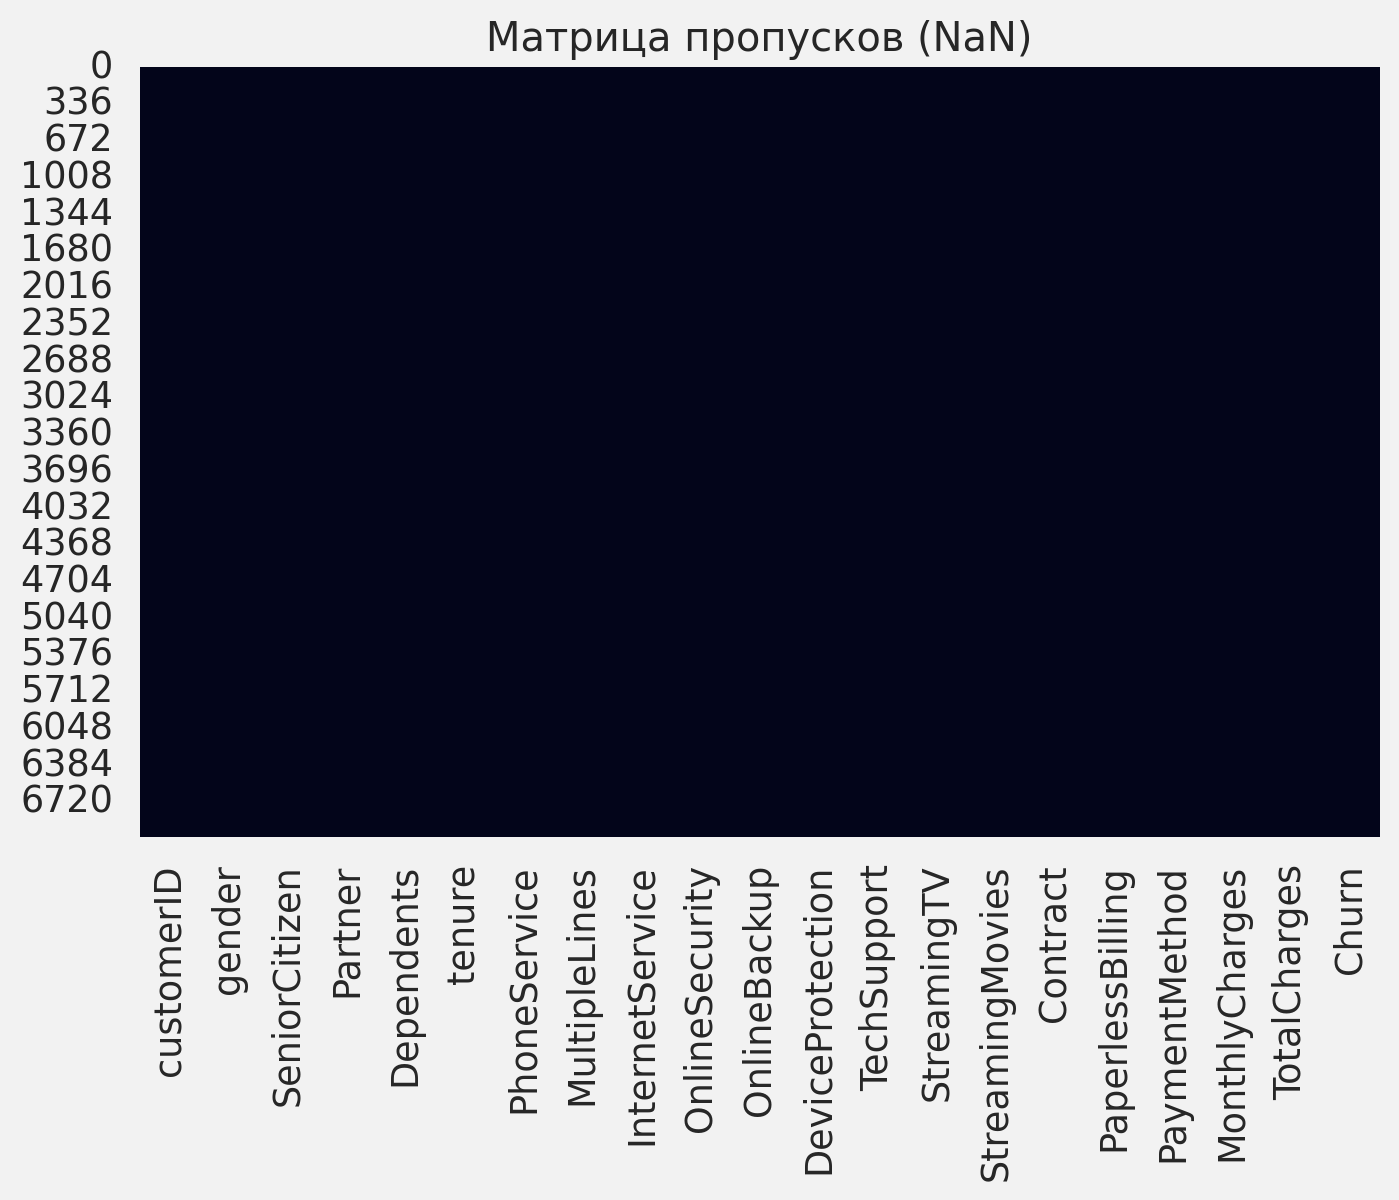

In [ ]:

print("Пропусков всего:", df.isna().sum().sum())
print("Дубликатов строк:", df.duplicated().sum())
sns.heatmap(df.isna(), cbar=False)
plt.title("Матрица пропусков (NaN)")
plt.show()


## 3. Визуализация числовых признаков

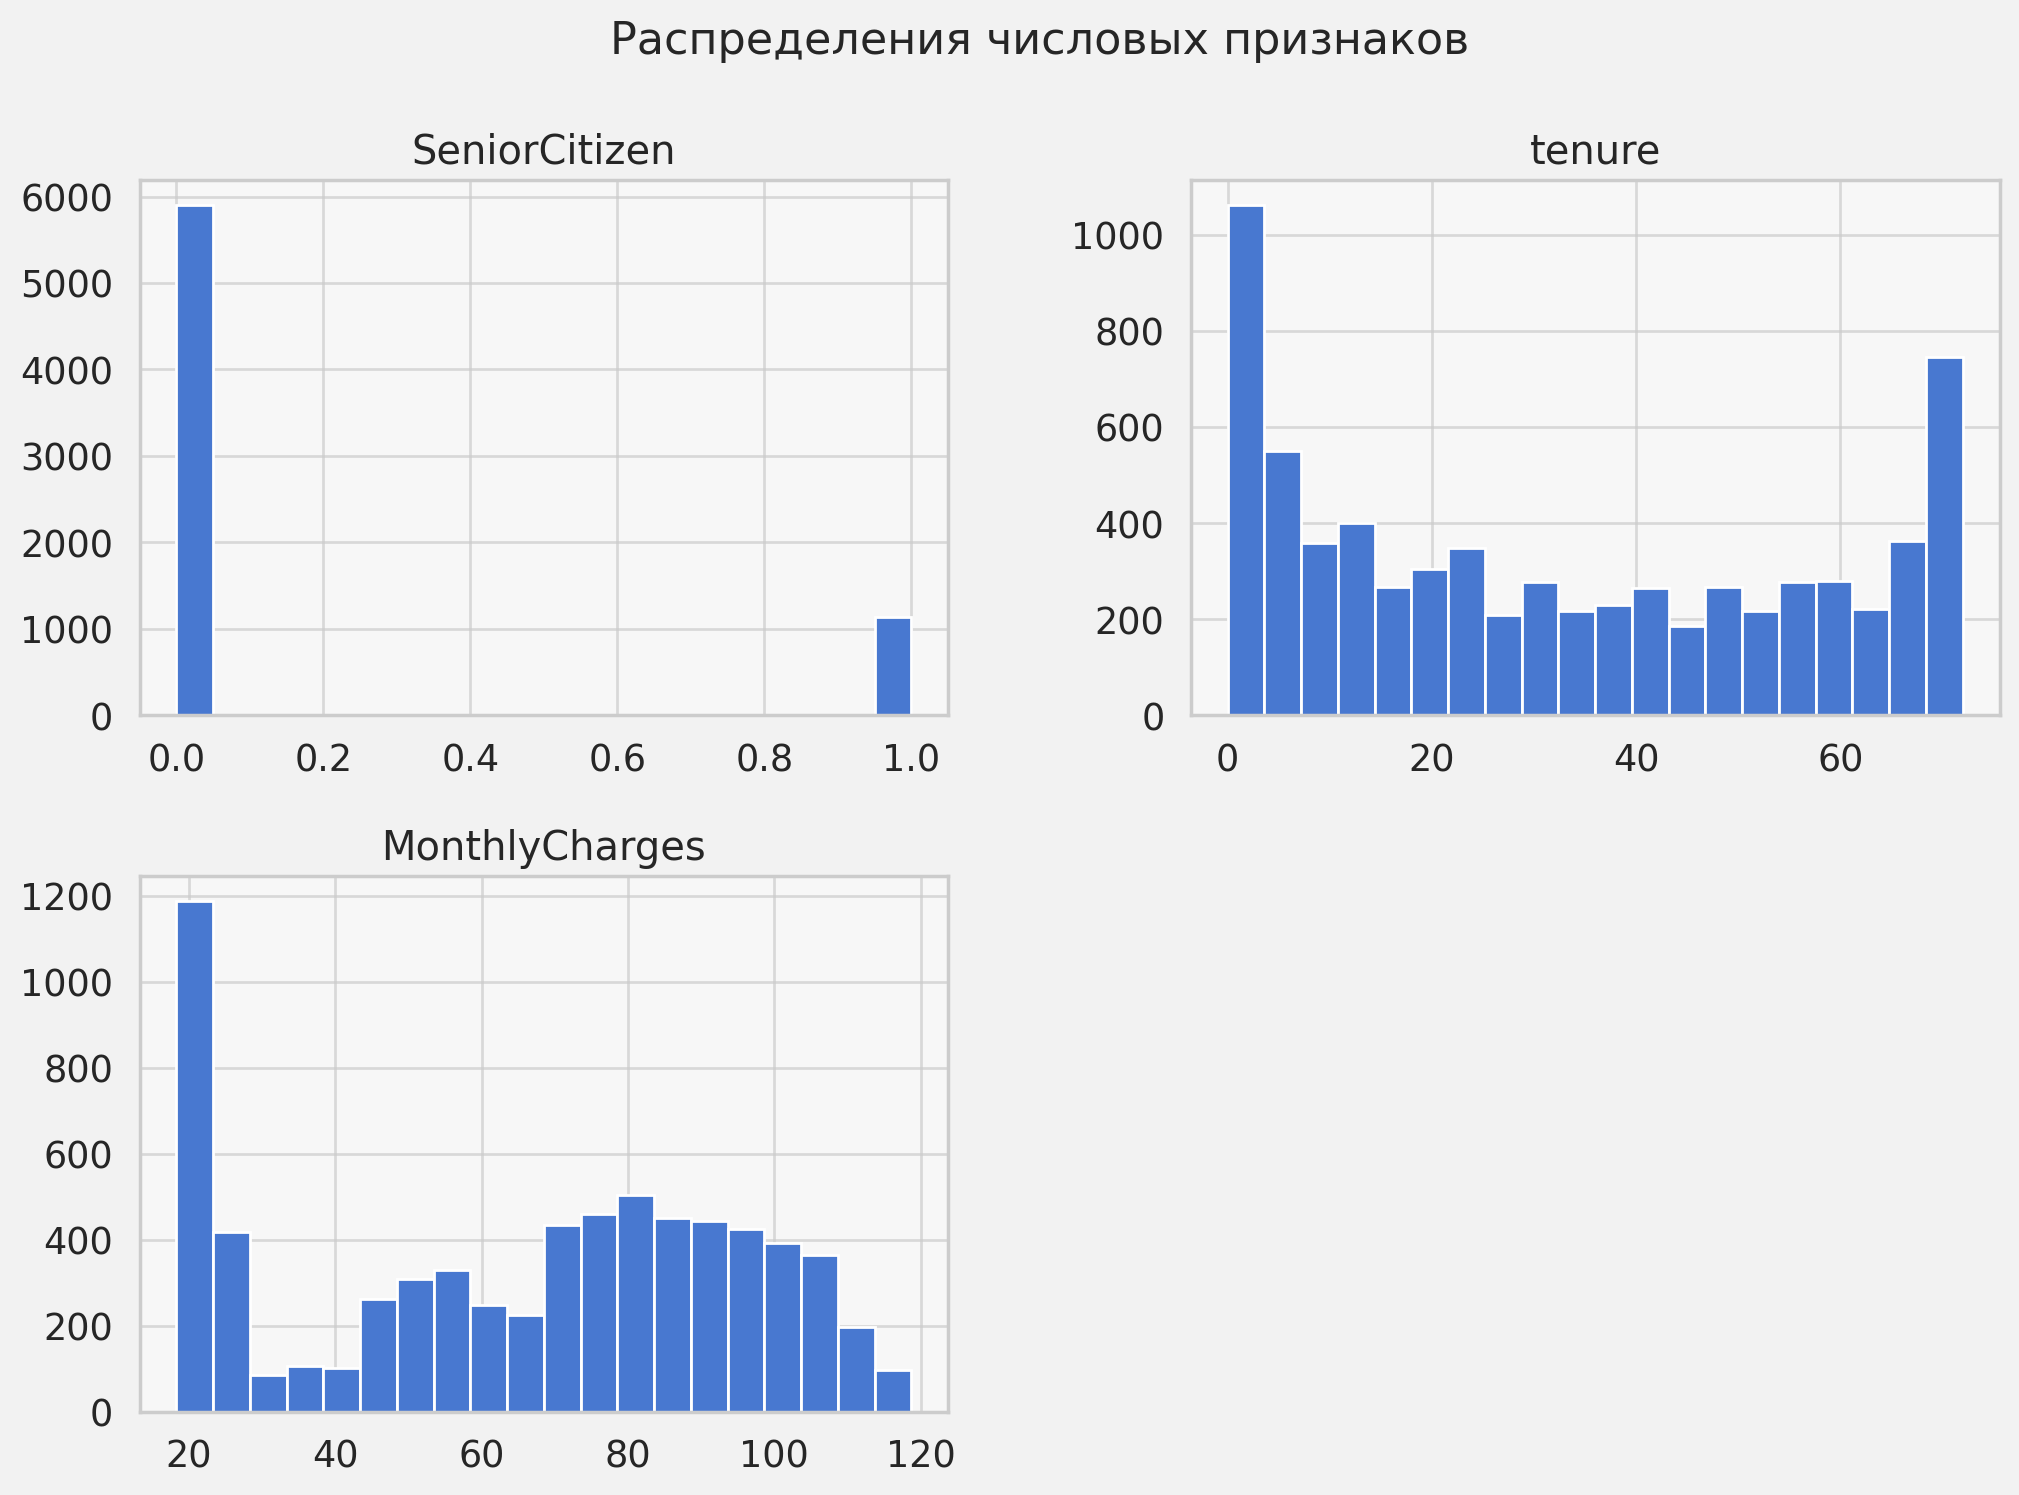

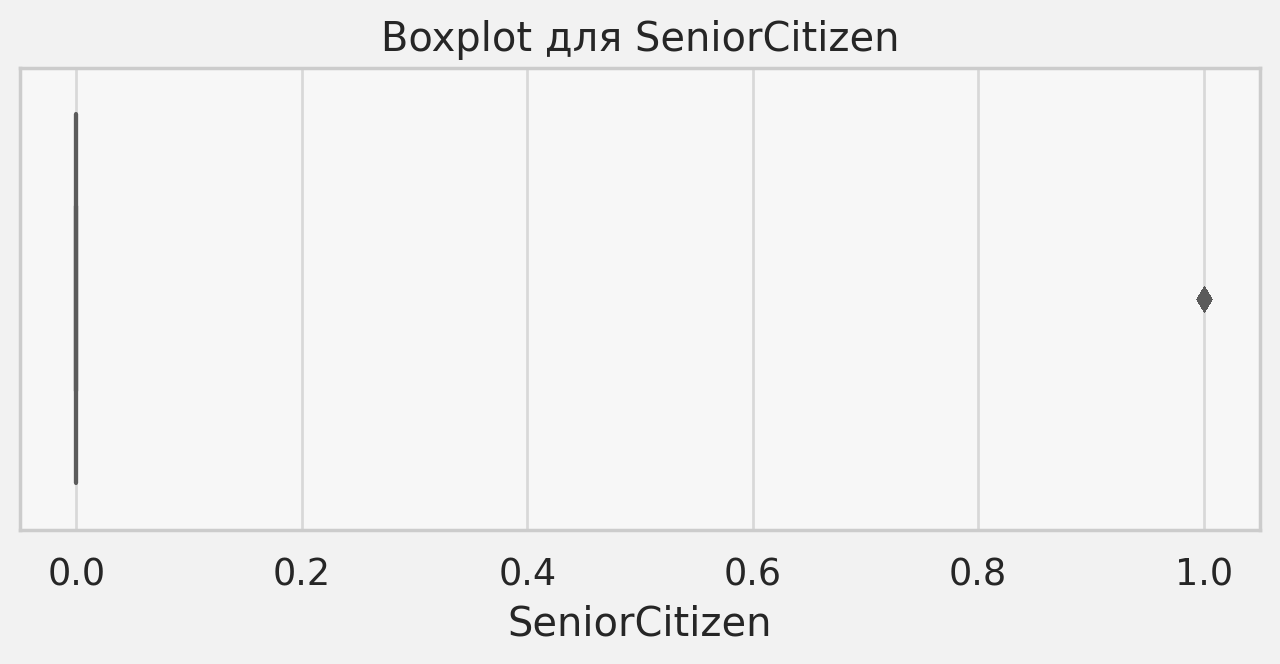

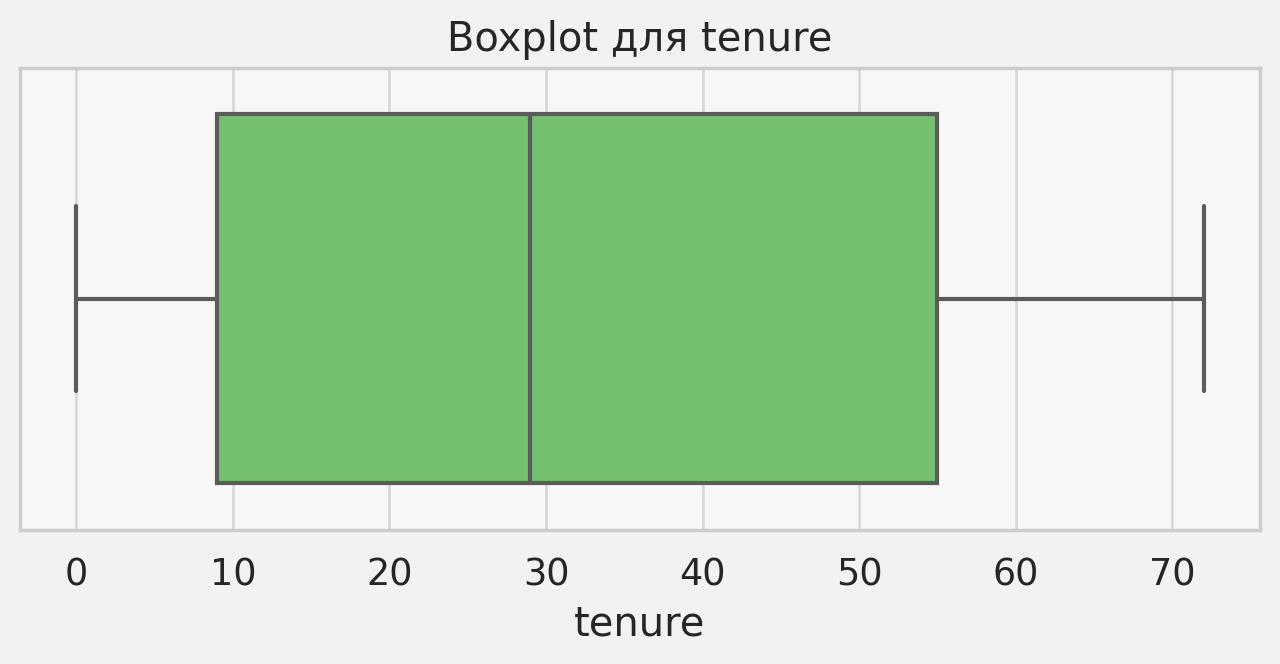

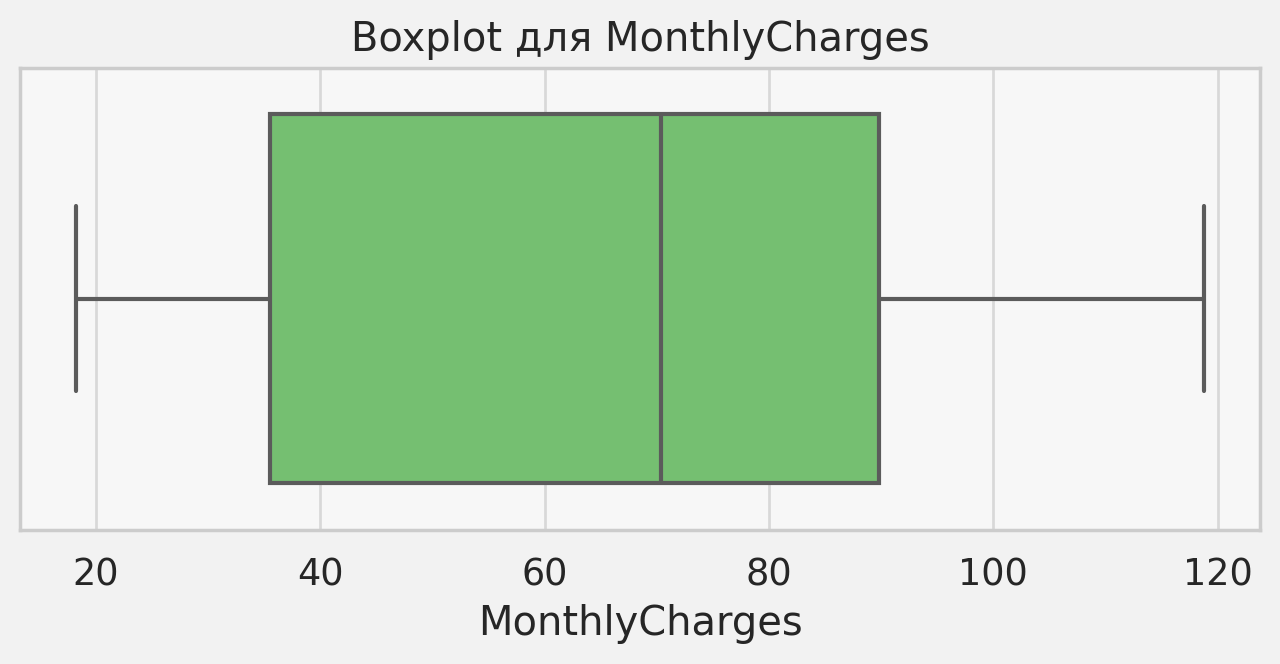

In [ ]:

numeric = df.select_dtypes(include=[np.number]).dropna()

# Гистограммы
numeric.hist(bins=20, figsize=(12, 8), color=sns.color_palette("muted")[0])
plt.suptitle("Распределения числовых признаков", fontsize=16)
plt.show()

# Boxplots для выбросов
for col in numeric.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=numeric[col], color=sns.color_palette("muted")[2])
    plt.title(f"Boxplot для {col}")
    plt.show()


## 5. Визуализация категориальных признаков

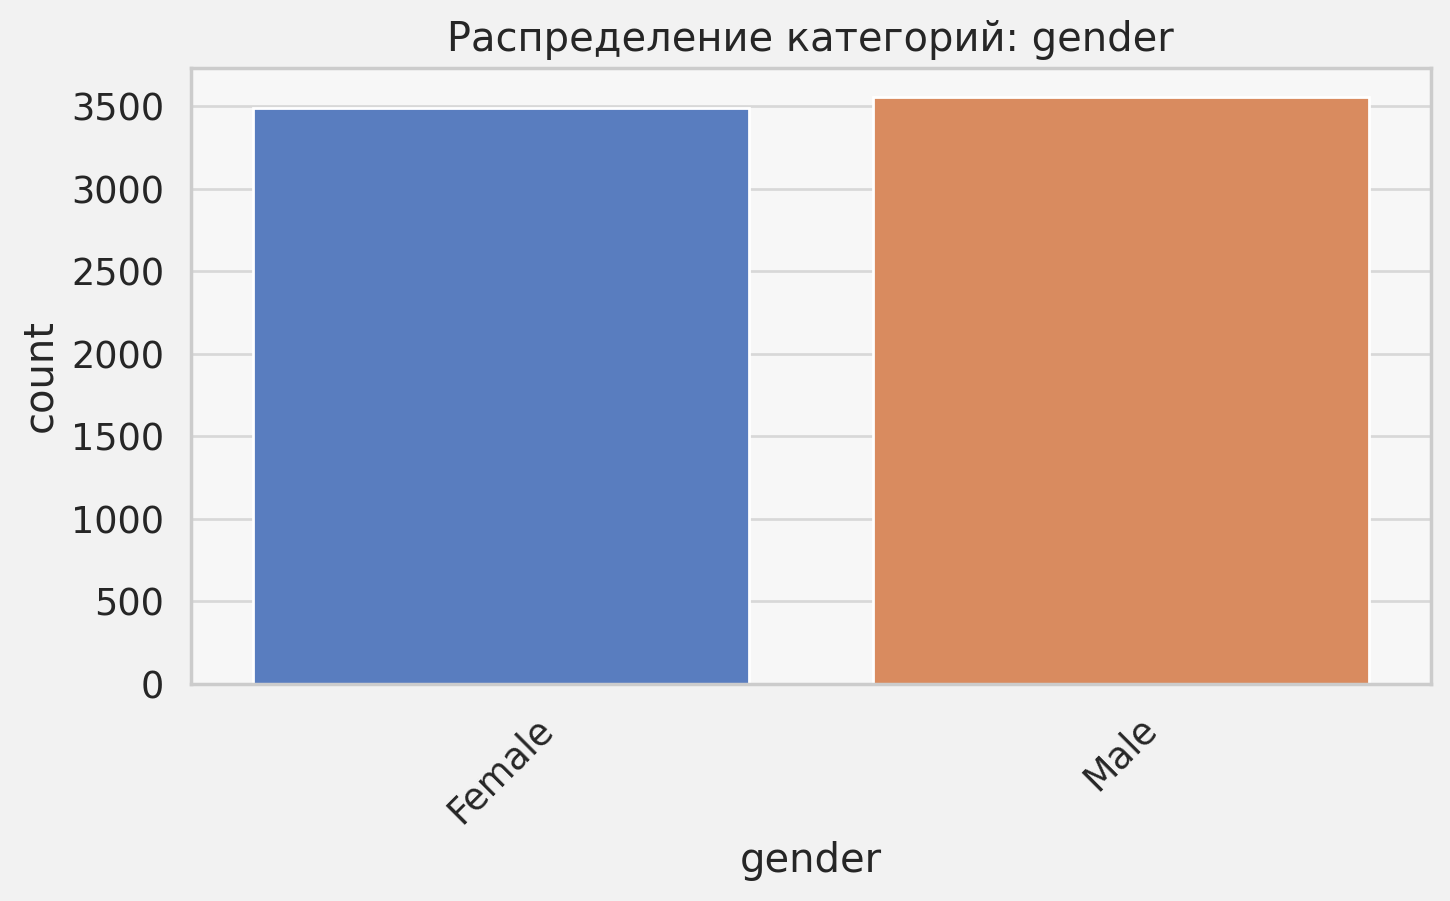

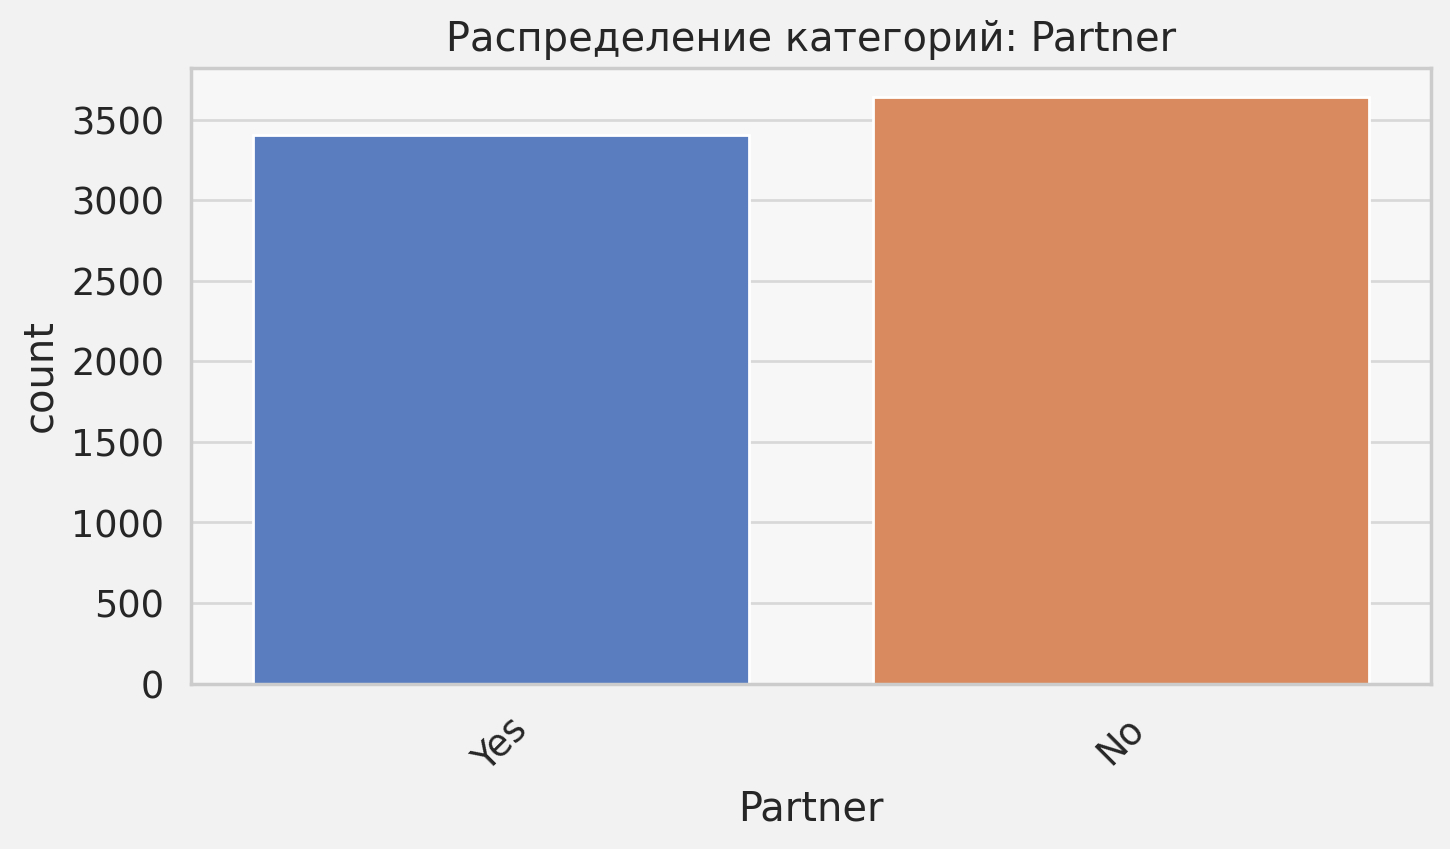

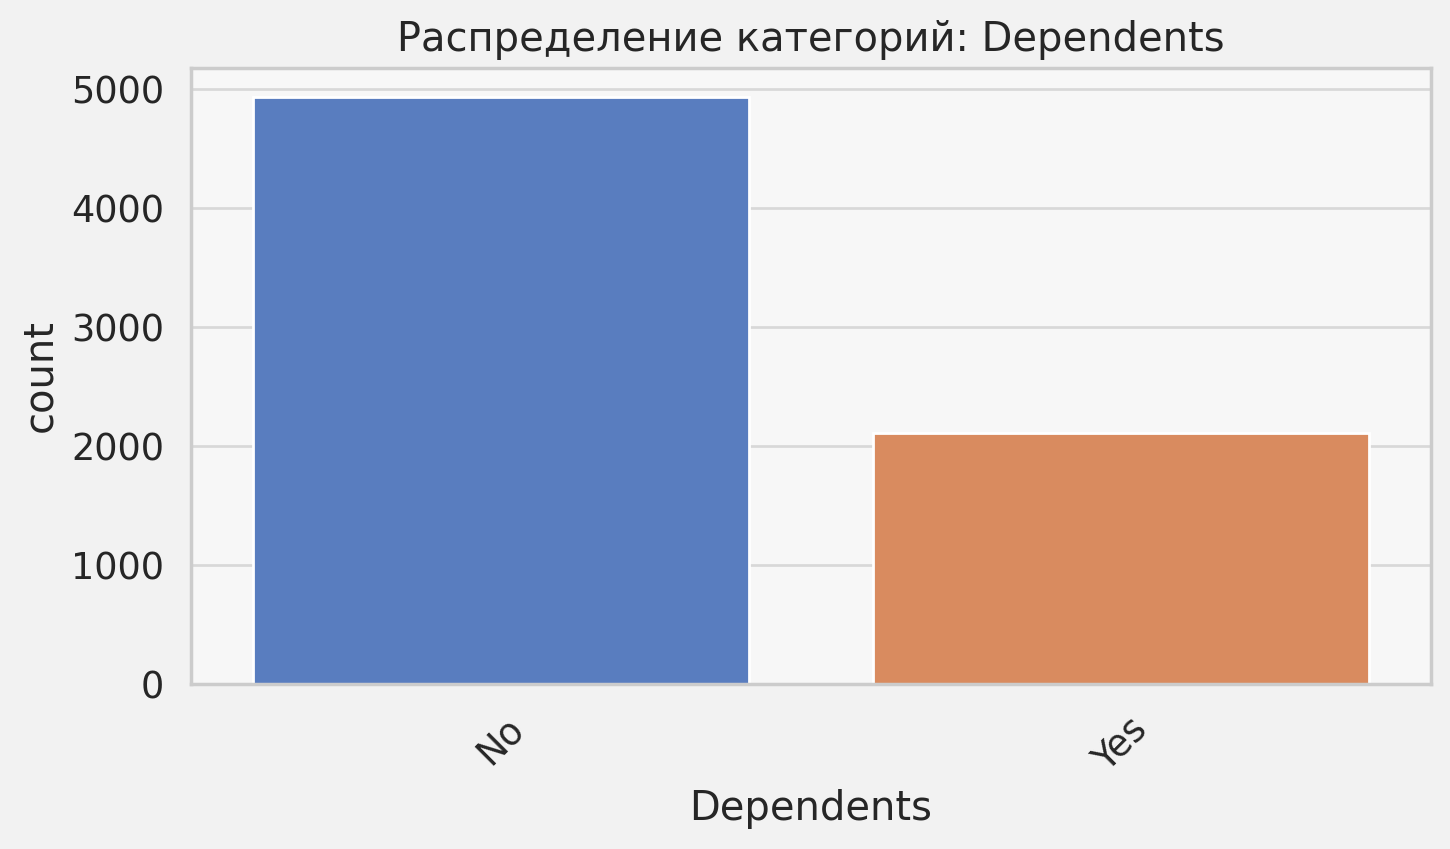

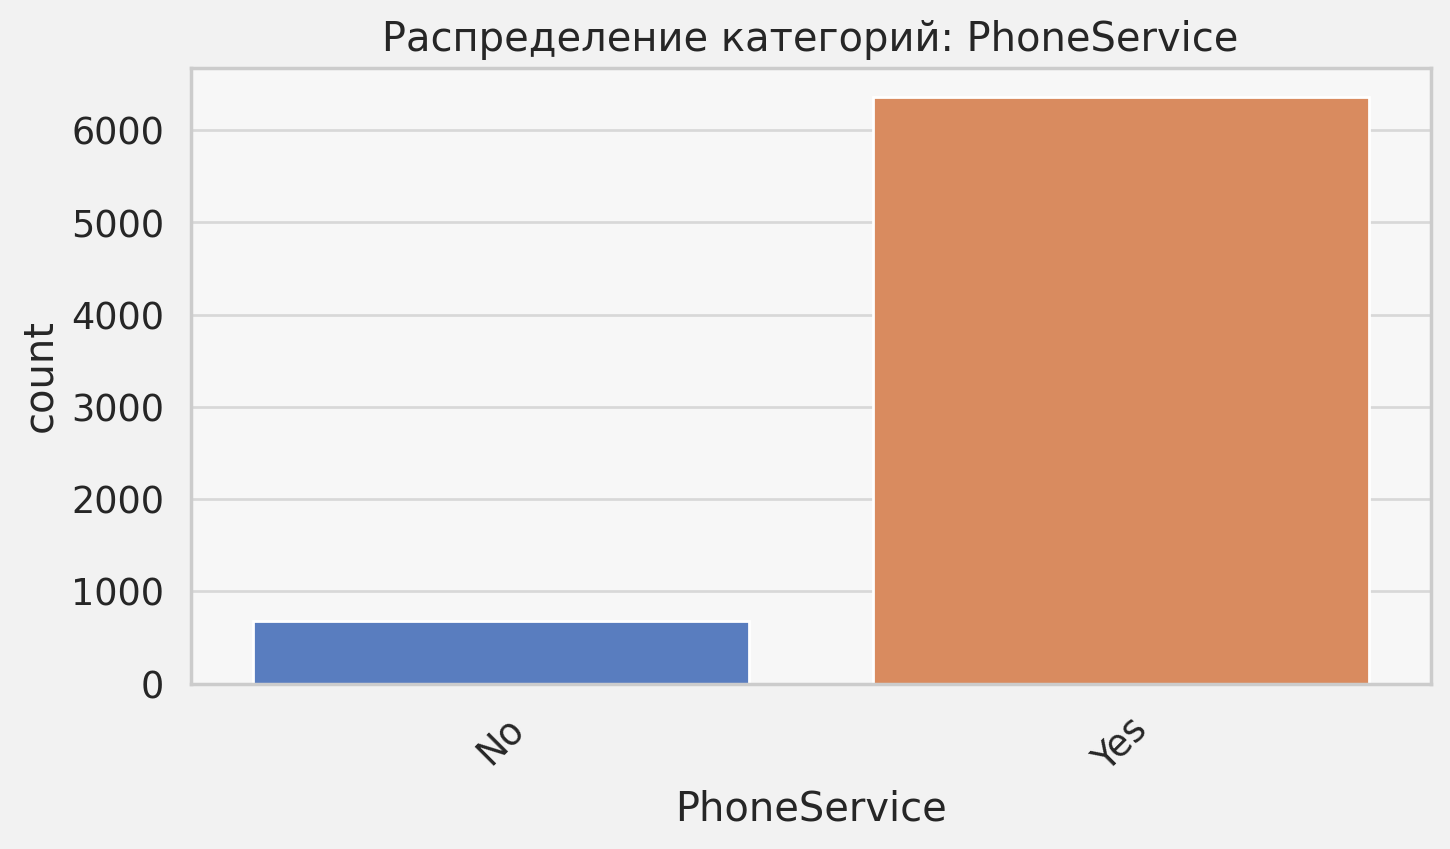

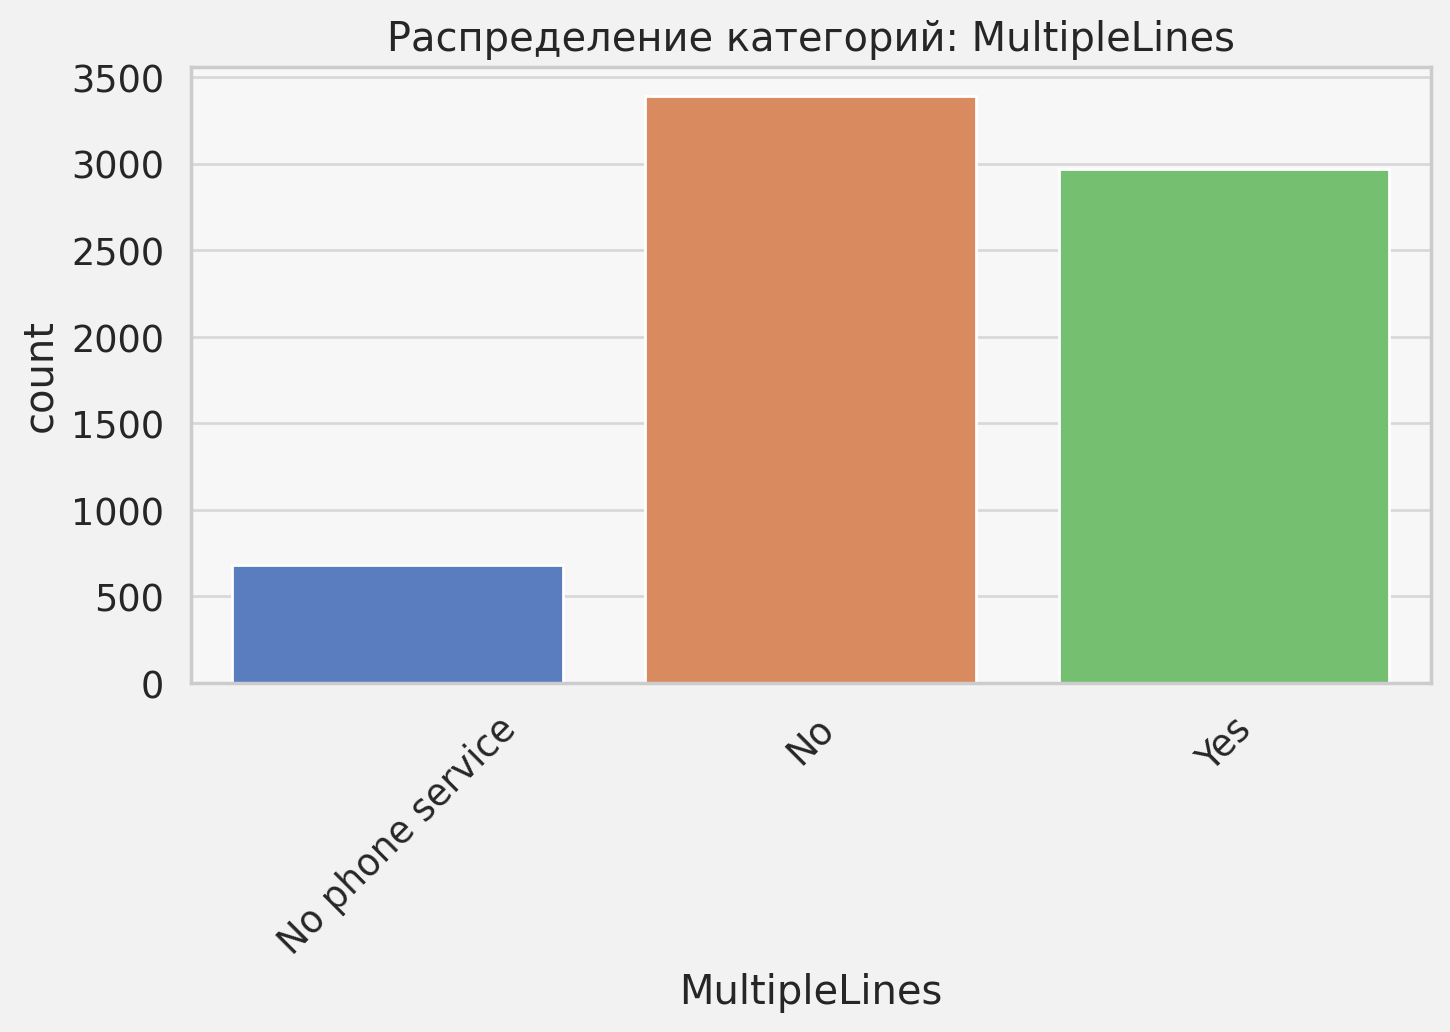

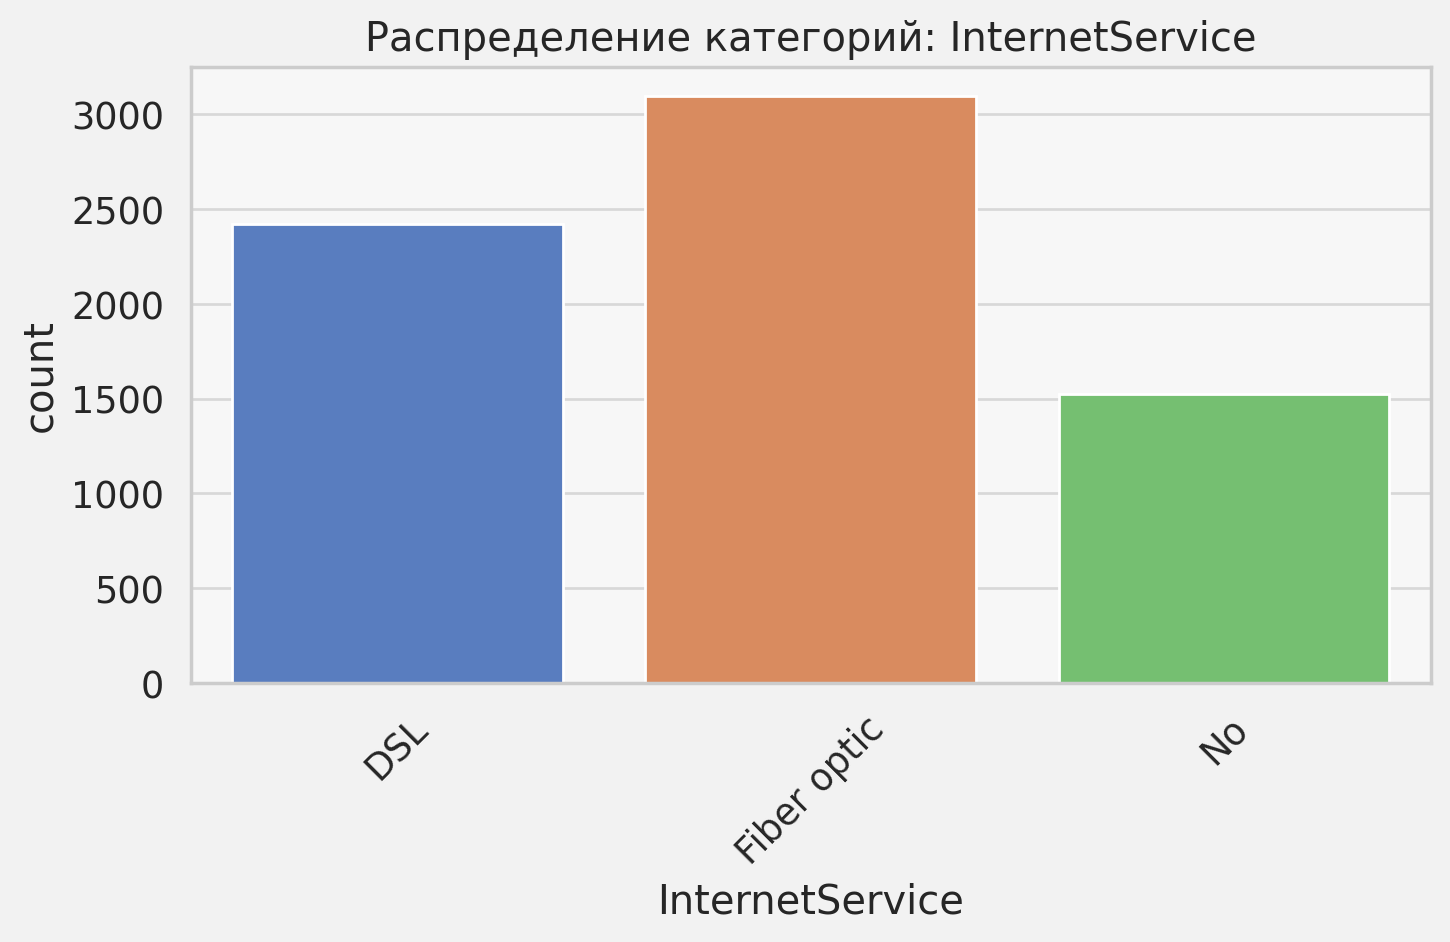

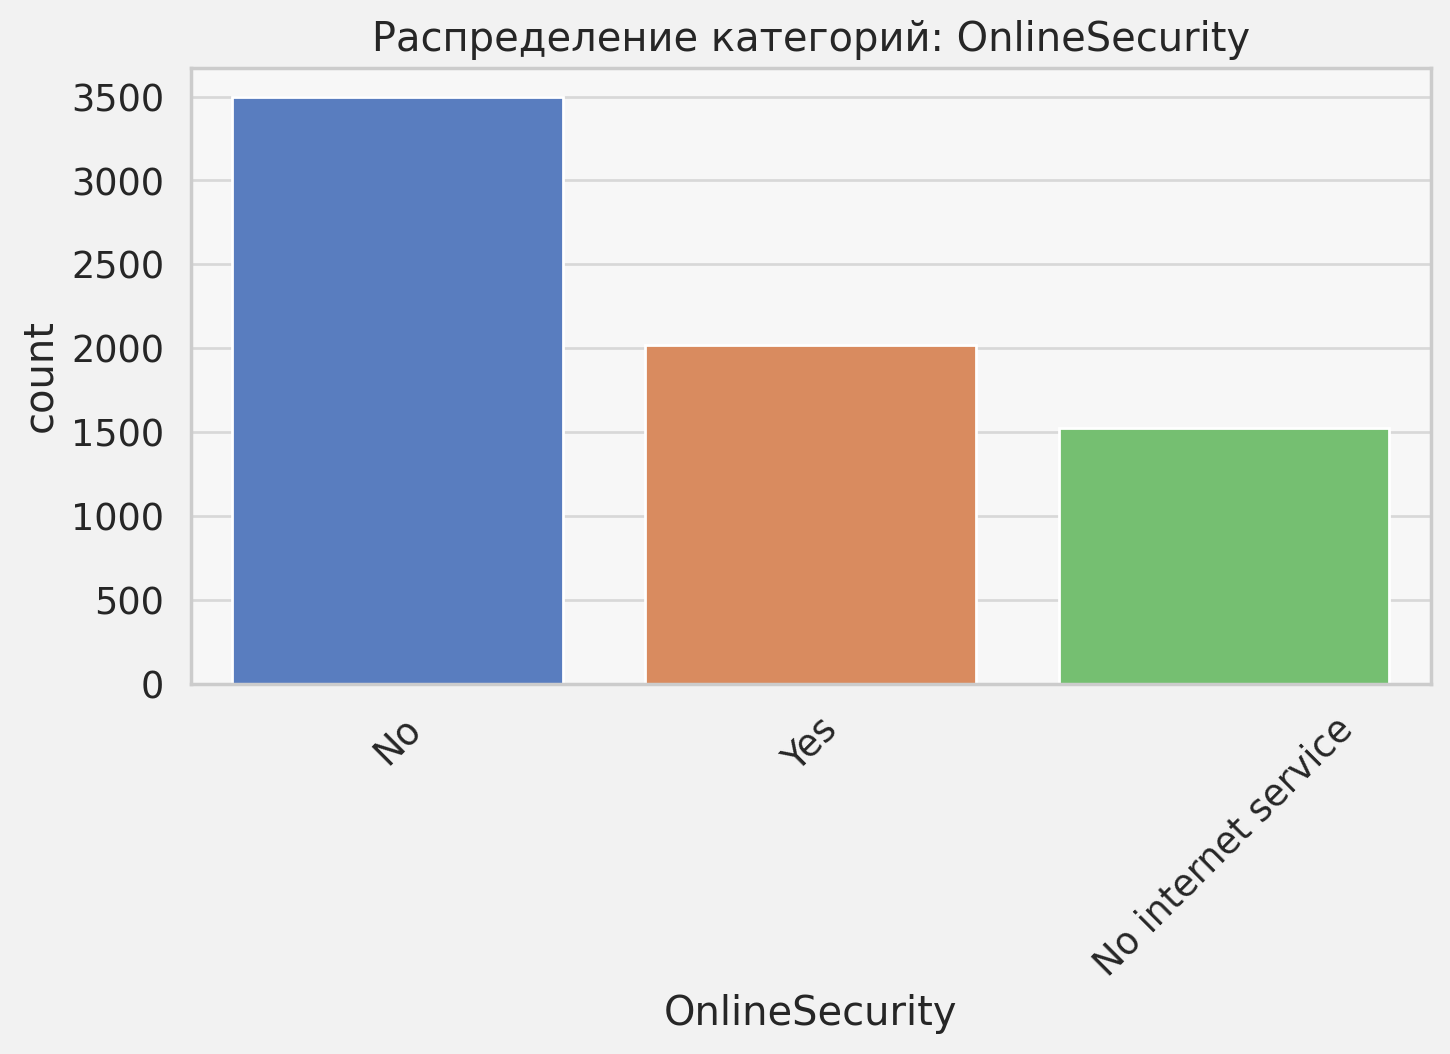

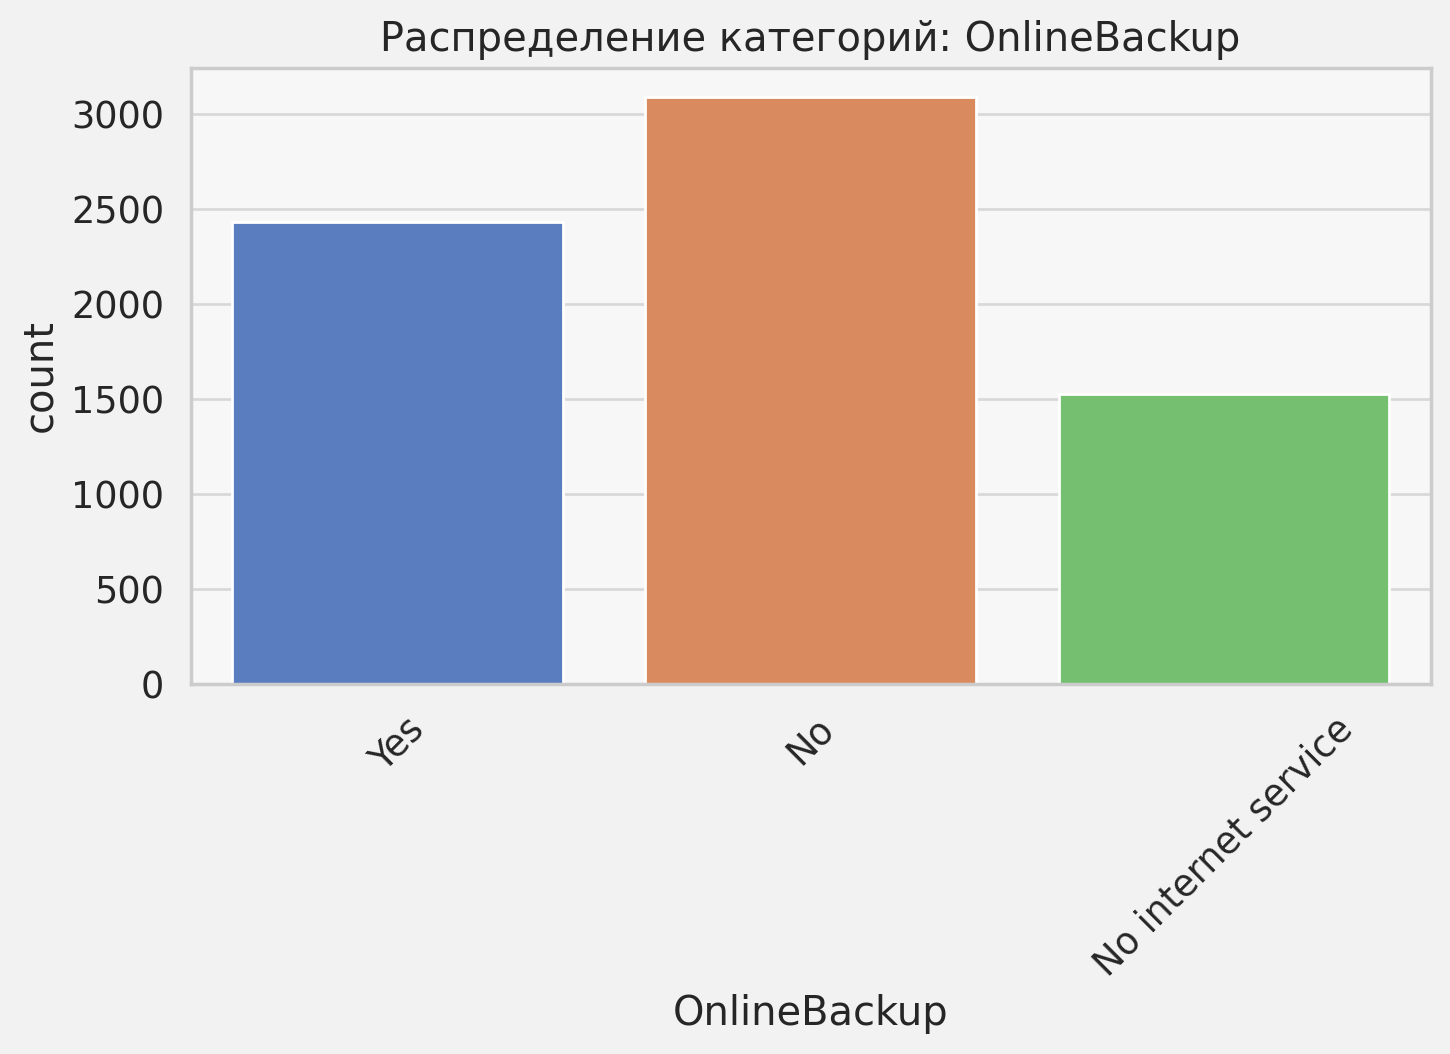

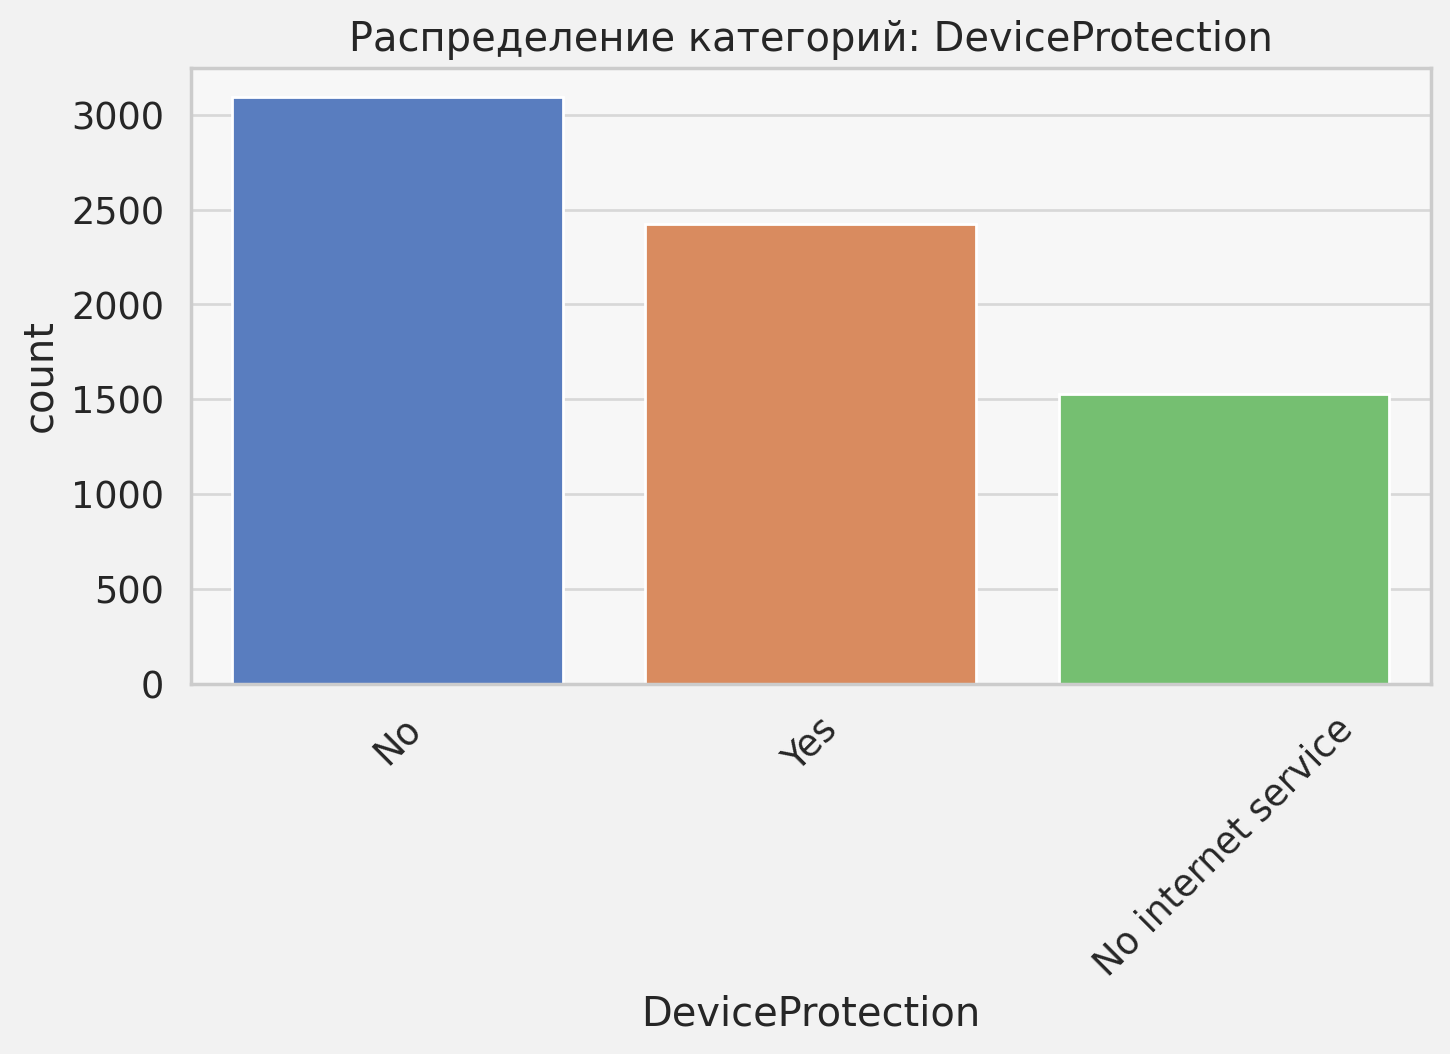

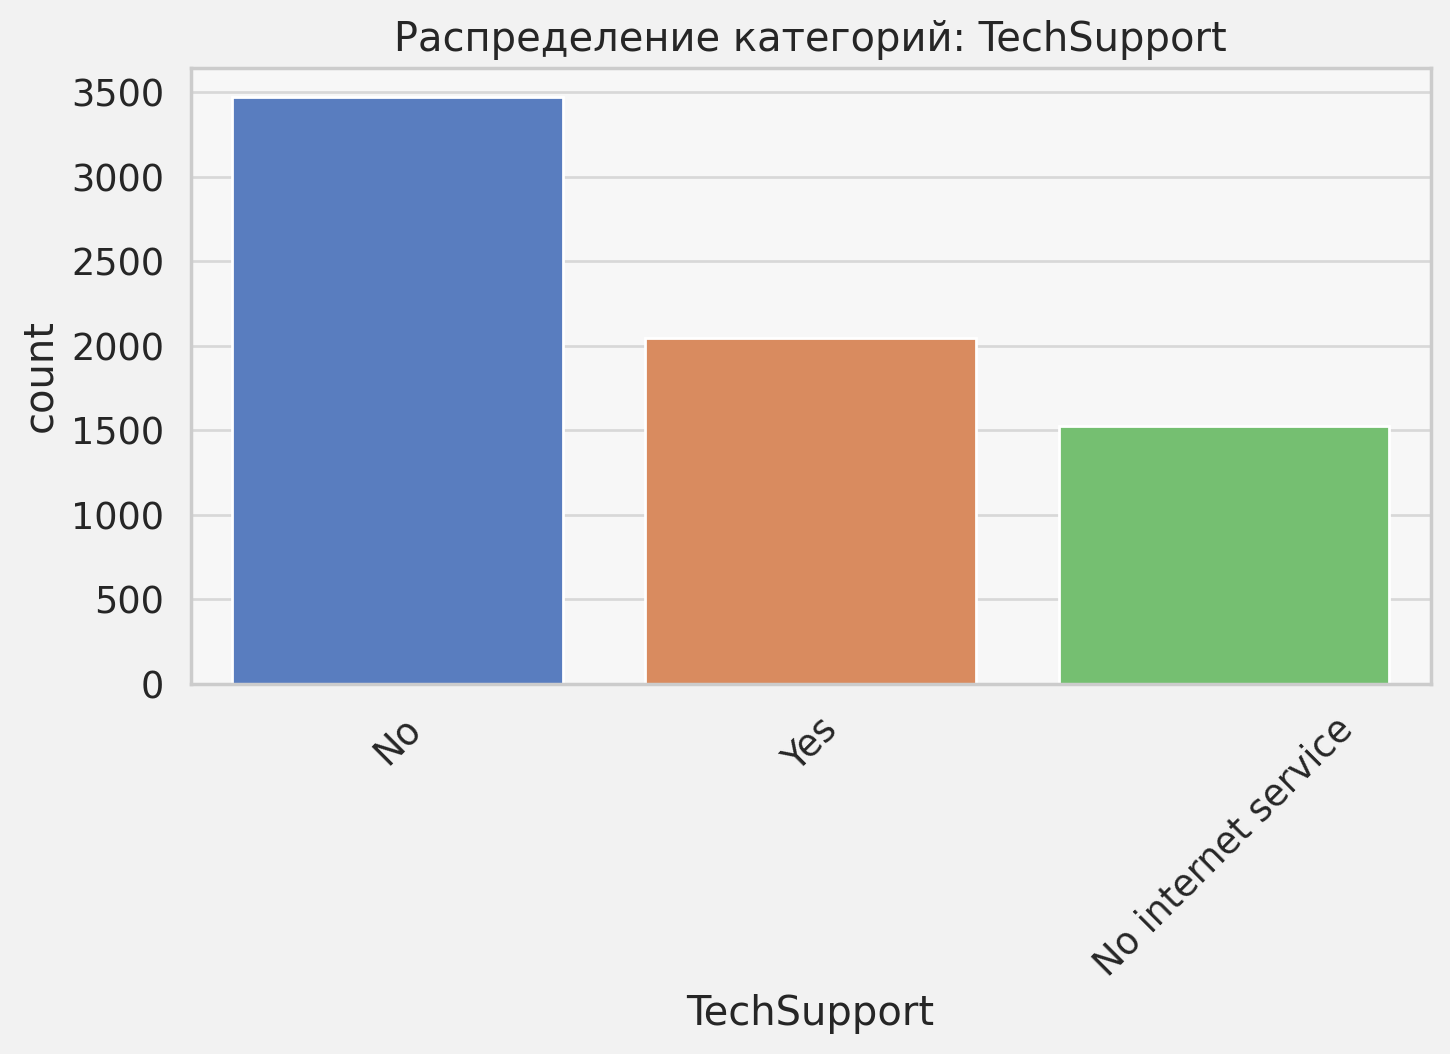

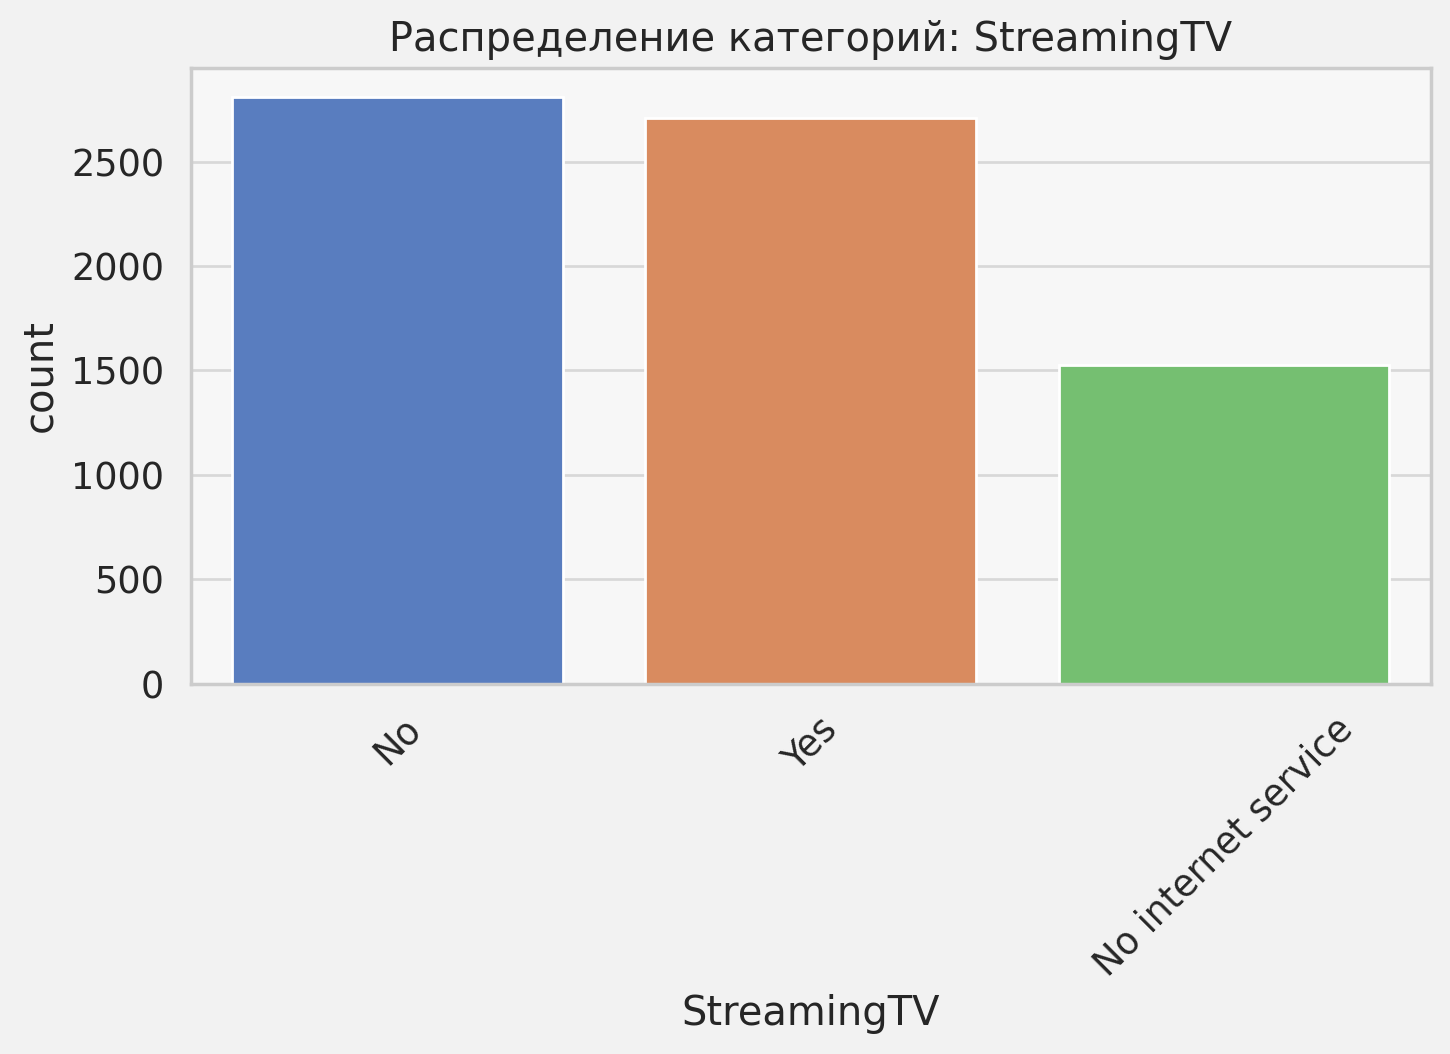

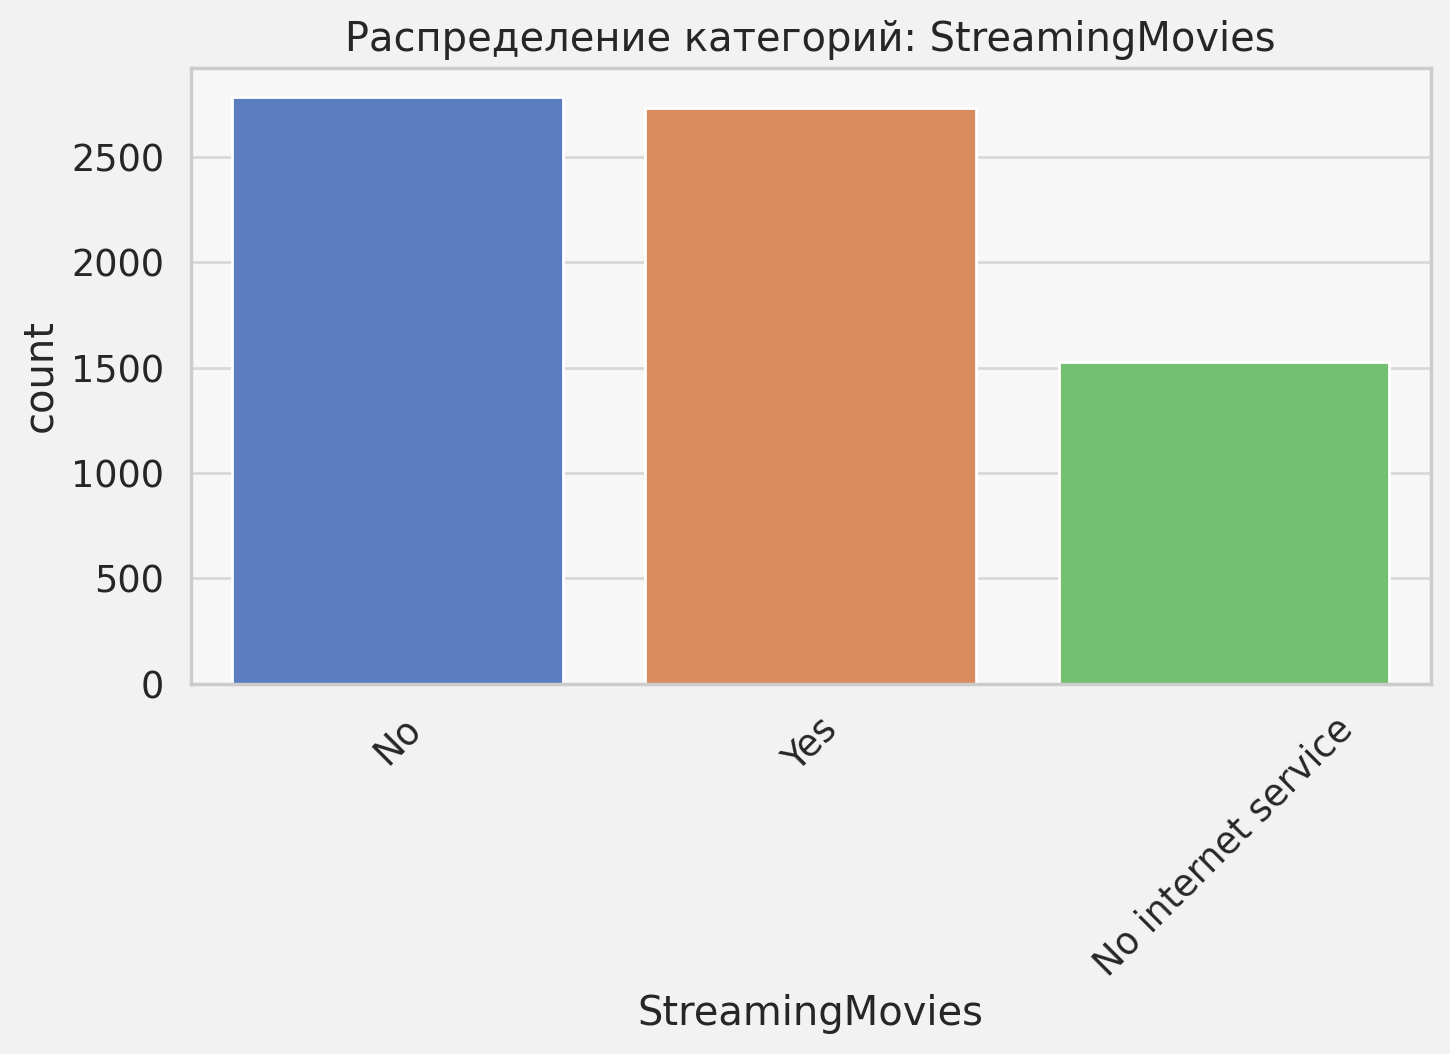

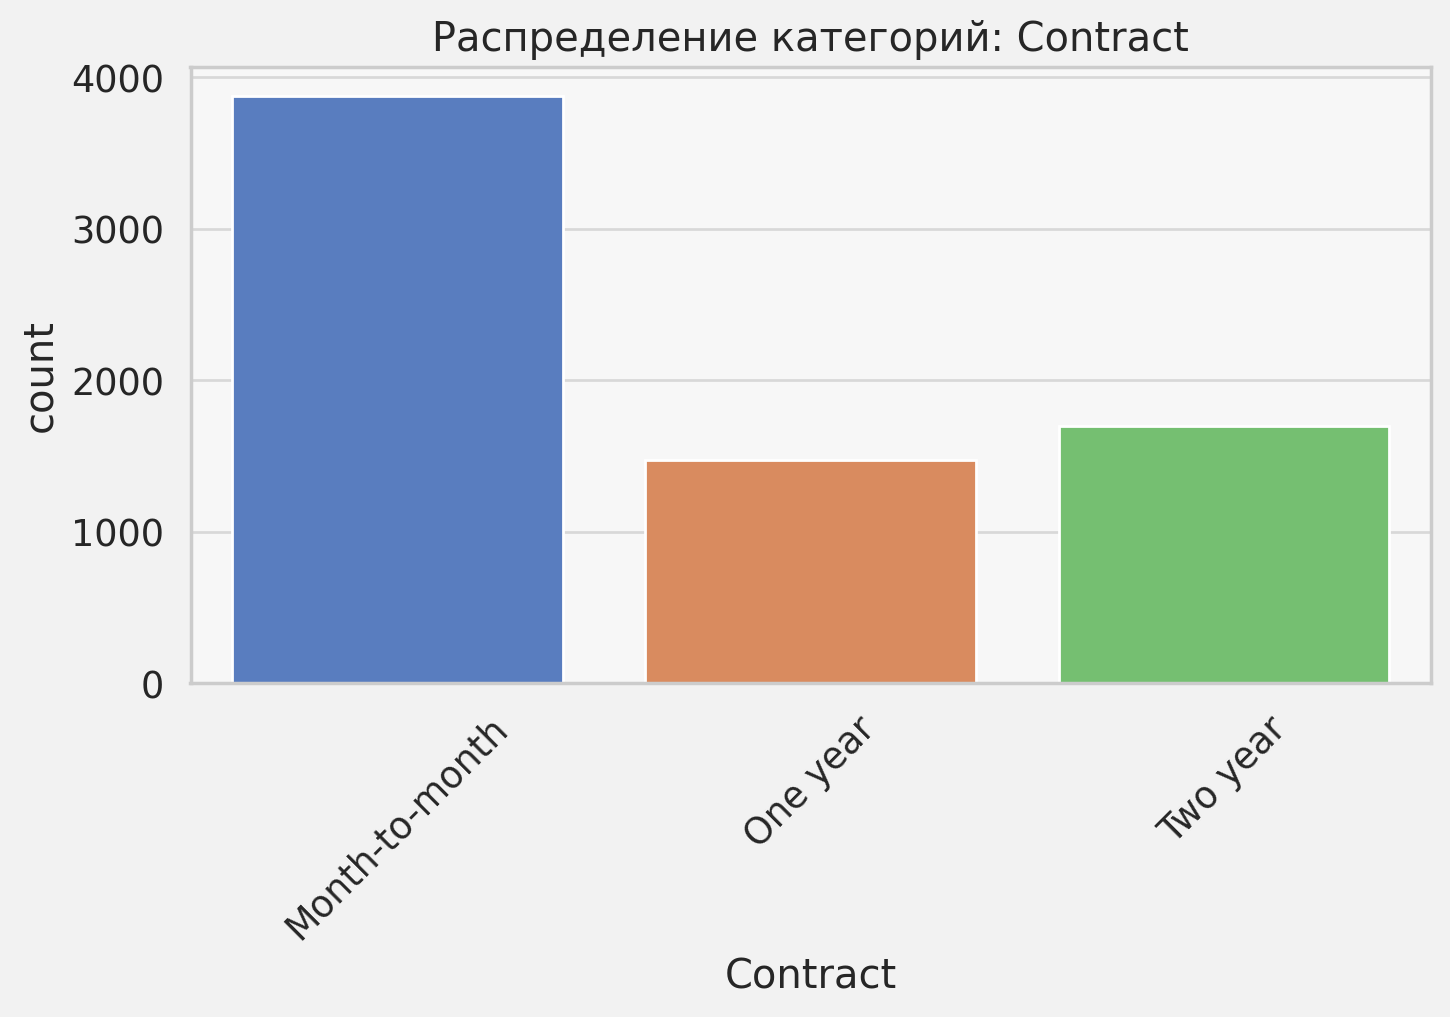

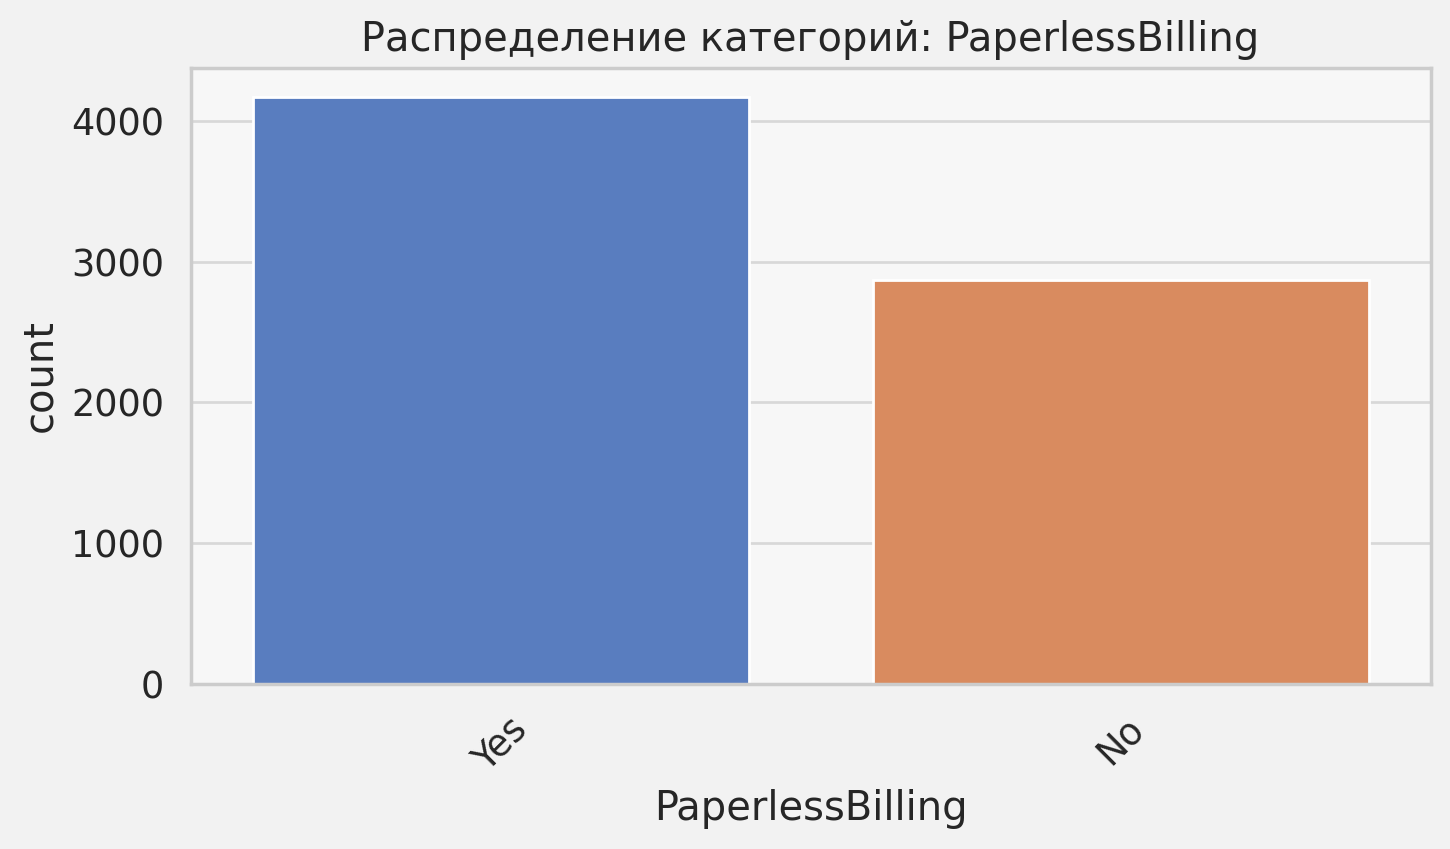

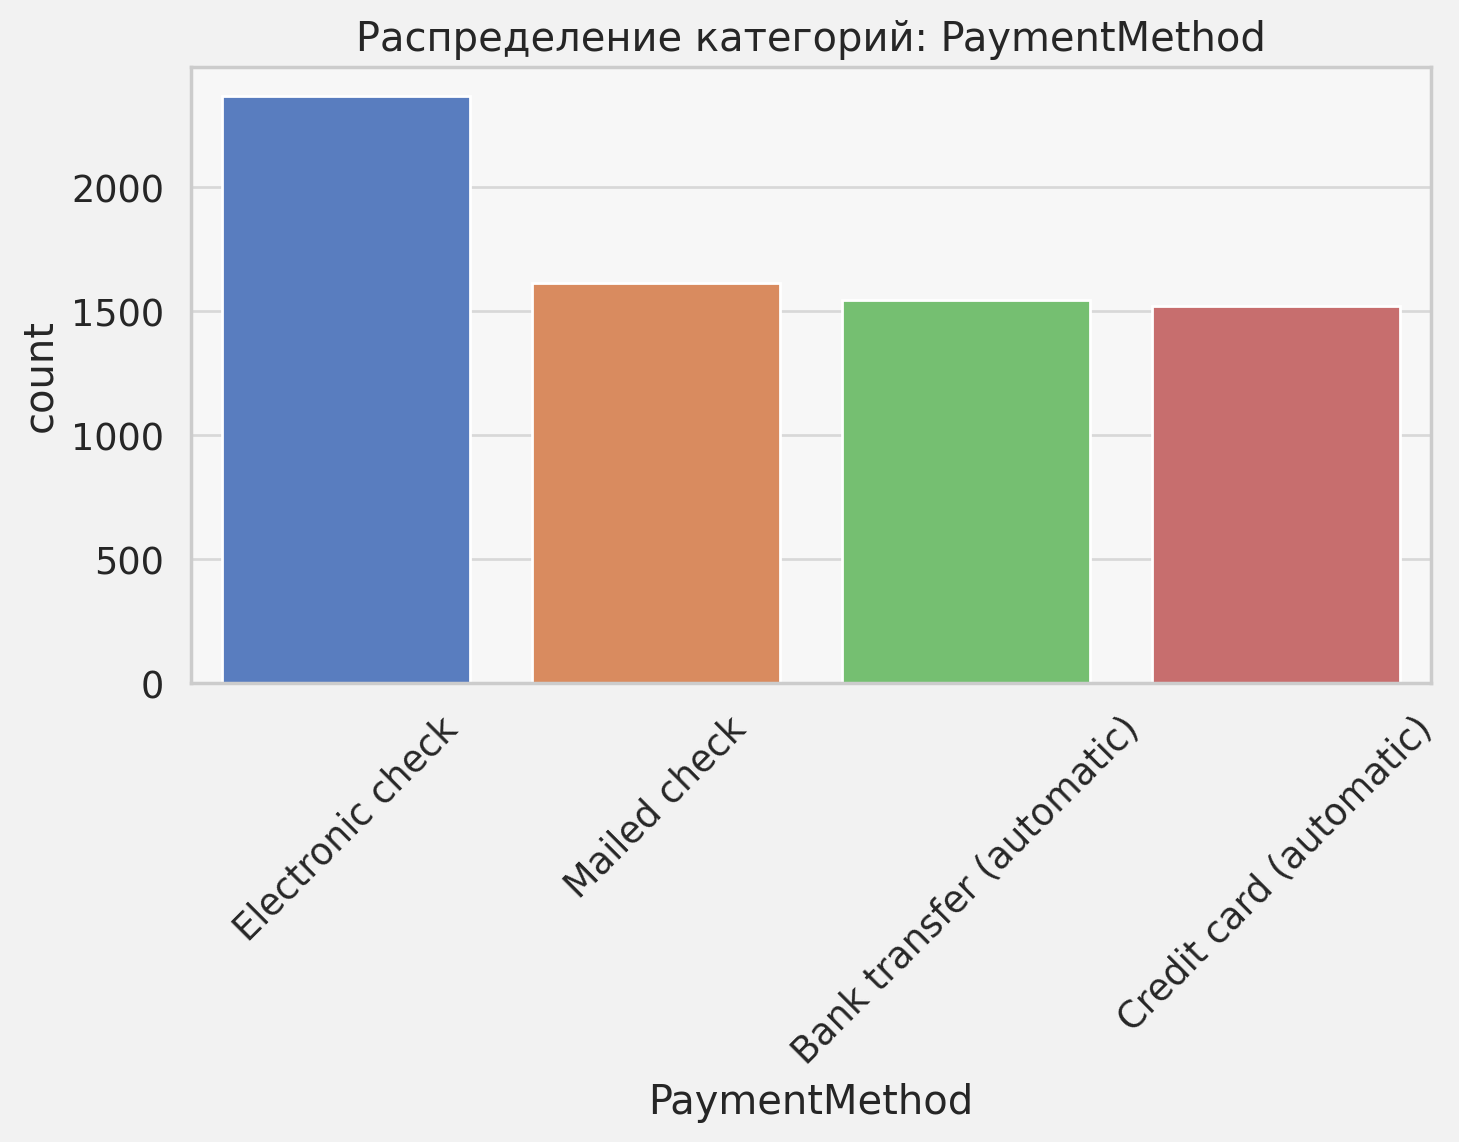

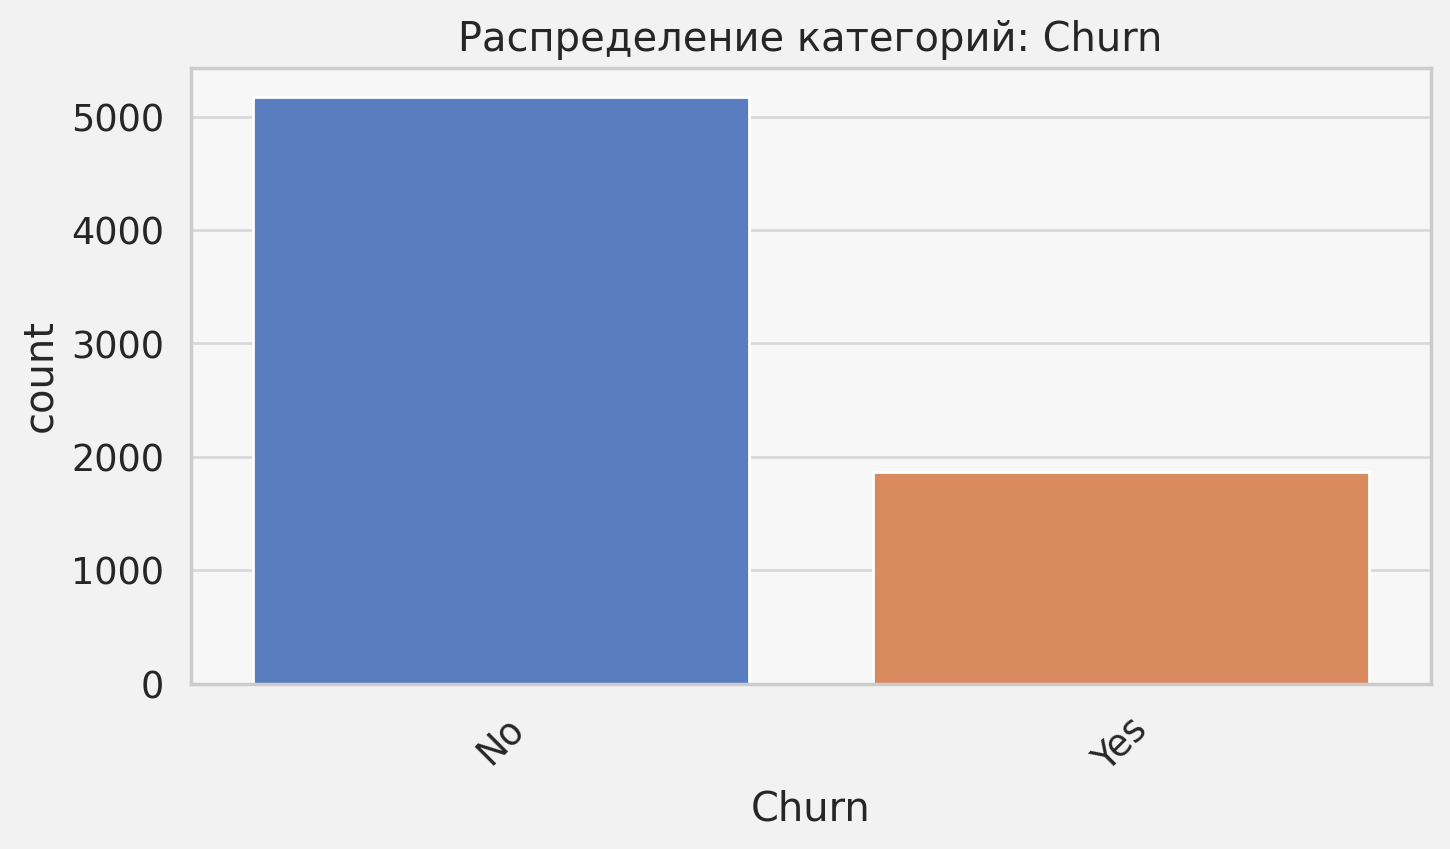

In [ ]:

categorical_cols = df.select_dtypes(exclude=[np.number]).nunique()
top_cats = categorical_cols[categorical_cols < 15].index

for col in top_cats:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="muted")
    plt.title(f"Распределение категорий: {col}")
    plt.xticks(rotation=45)
    plt.show()


## 6. Корреляция числовых признаков

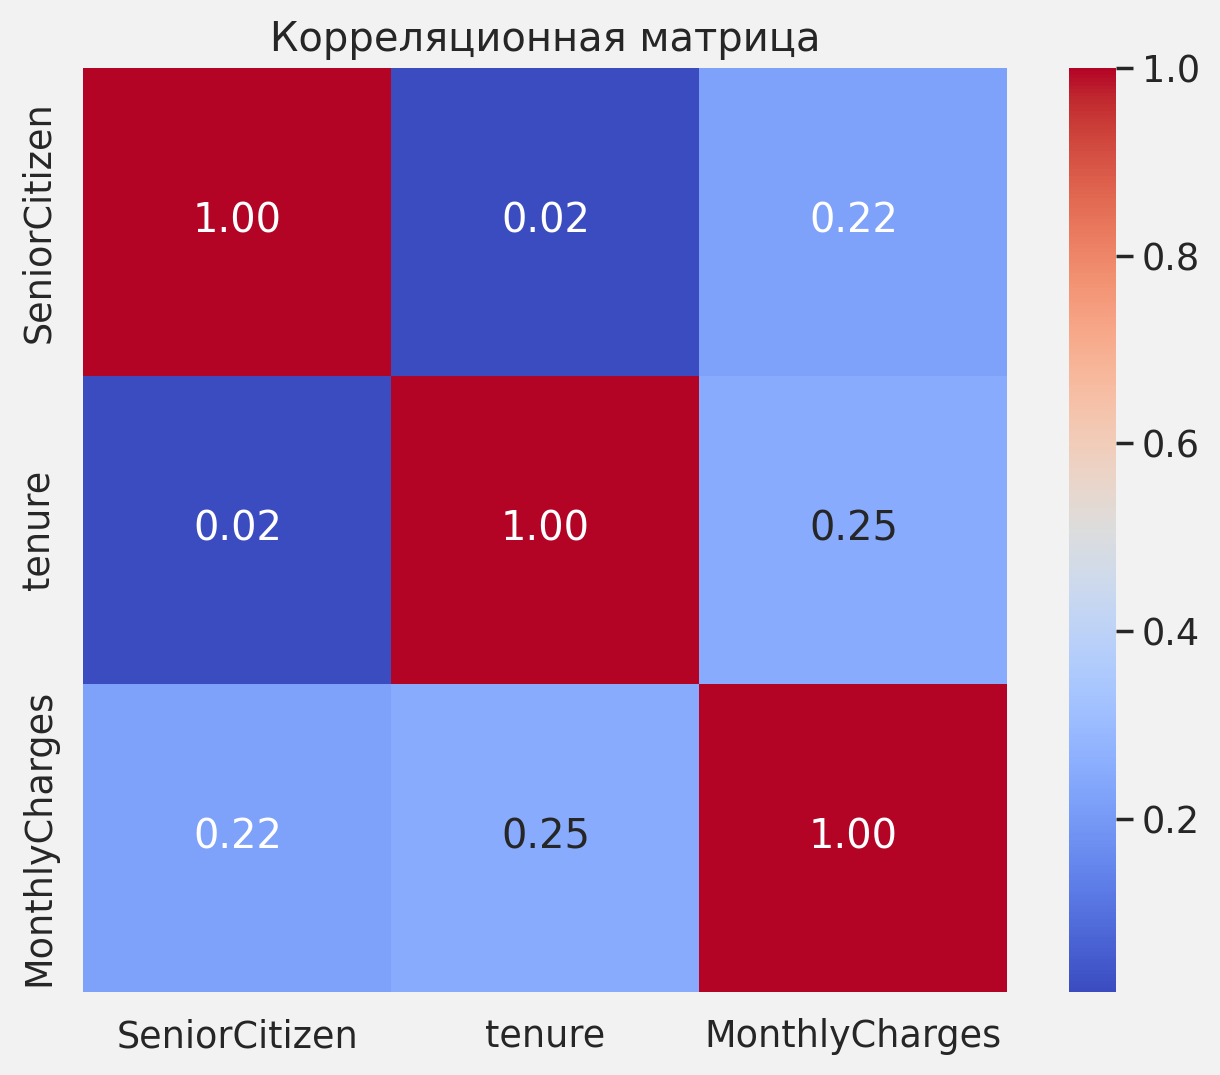

In [ ]:

if numeric.shape[1] > 1:
    corr = numeric.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Корреляционная матрица")
    plt.show()
else:
    print("Недостаточно числовых признаков для корреляции.")



## 7. Выводы
- Проверена структура и целостность данных  
- Построены гистограммы, boxplots и pairplot  
- Визуализированы категориальные переменные и корреляции  
- Применён единый стиль визуализации Seaborn  
